In [36]:
import requests
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from urllib.parse import quote

In [37]:
from tqdm.notebook import tqdm
driver = webdriver.Chrome('C:\\Users\\Bestc\\Desktop\\빅데이터 지능형 서비스 개발과정(멀티캠퍼스)\\설치프로그램\\Selenium\\chromedriver.exe')
search_words = '디지털 소외계층'
URL = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=' + quote(search_words)
driver.get(URL)

<ipython-input-37-dfe872a7bb44>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:\\Users\\Bestc\\Desktop\\빅데이터 지능형 서비스 개발과정(멀티캠퍼스)\\설치프로그램\\Selenium\\chromedriver.exe')


In [38]:
import re
raw_data_list = []
for i in tqdm(range(100)):
    try:
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        raw_data = soup.select_one('section > div.api_subject_bx > .group_news > .list_news').text
        raw_data = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', raw_data)
        raw_data_list.append(raw_data)
        driver.find_element_by_xpath("//*[@id='main_pack']/div[2]/div/a[2]").click()
        time.sleep(3)
    except:
        print(i)

  0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-38-e7095efb5334>:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath("//*[@id='main_pack']/div[2]/div/a[2]").click()


In [39]:
len(raw_data_list)

100

In [40]:
df = pd.DataFrame(list(raw_data_list), columns = ['data'])
df.head()

,data
0,문서 저장하기 에 저장 바로가기 아주경제시간 전 디지털금융 소외 가...
1,문서 저장하기 에 저장 바로가기 뉴데일리일 전 방통위 소외계층 위한...
2,문서 저장하기 에 저장 바로가기 뉴스일 전 한국건강증진개발원과 디...
3,문서 저장하기 에 저장 바로가기 매일일보 시중 너도나도 디지털 특화...
4,문서 저장하기 에 저장 바로가기 교수신문 서울대 글로벌사회공헌단 보...


In [41]:
df.data.nunique()

100

In [42]:
df.data.isnull().sum()

0

In [43]:
sdf = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\한국어불용어100.txt', encoding ='UTF-8', sep = '\s+', header = None)
sdf.head()

,0,1,2
0,이,VCP,0.018280
1,있,VA,0.011699
2,하,VV,0.009774
3,것,NNB,0.009733
4,들,XSN,0.006898


In [44]:
from konlpy.tag import Okt
okt = Okt()
stopwords = set(sdf[0])
tokenized_data = []
for sentence in tqdm(df.data):
    morphs = okt.morphs(sentence.strip(), stem = True)
    temp_list = [word for word in morphs if word not in stopwords]
    tokenized_data.extend(temp_list)
len(tokenized_data)

  0%|          | 0/100 [00:00<?, ?it/s]

68156

In [45]:
# 한글 폰트 적용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/정직_1.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

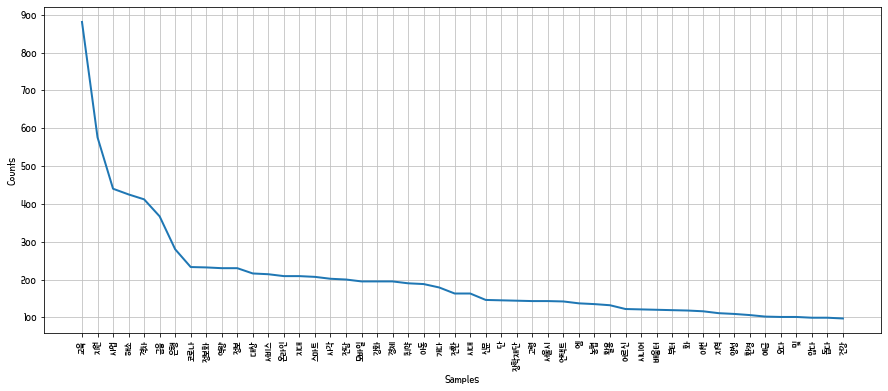

In [48]:
import nltk
stoptext = '''하다 문서 저장 에 바로가기 언론사 분 선정 측 의 사단 네이버뉴스 과 는 있다 를 인 은 와 하고 으로 스케 어 제 신 보기 전체 다 관리
              관련 로 없다 경 당 없다 날 이다 찾다 대해 첫 되다 도 뉴스 에서 을 뉴시스 조선일보 한국 연합뉴스 대 회 비단 위 기 헬 건 출시
              당시 대한 은 예비 일보 키 오스 층 면 크다 장 디지털 소외 계층 비대 위해 재원 따르다 운영 개발 에듀 통해 찾아가다 증진 재원 버스
              형 까지 기기 센터
'''
stopwords2 = stoptext.split()
new_tokens = [word for word in tokenized_data if word not in stopwords2]
keywords = nltk.Text(new_tokens, name = '윤석열 검색결과')
plt.figure(figsize = (15, 6))
keywords.plot(50)
plt.show()

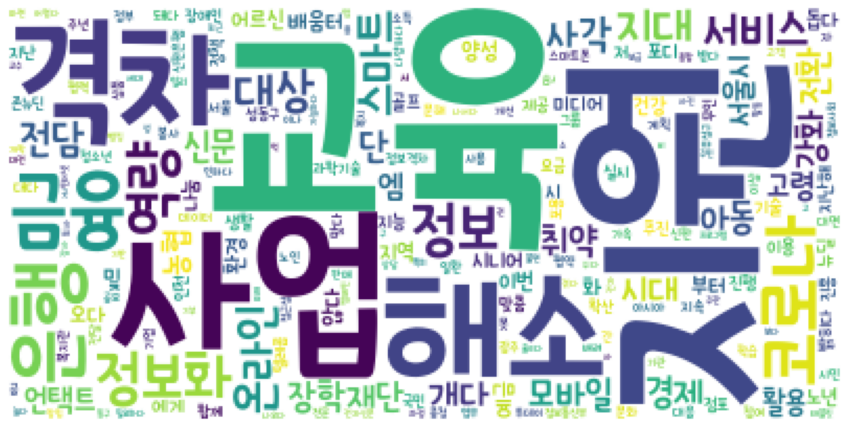

In [49]:
from wordcloud import WordCloud
from PIL import Image
data = keywords.vocab().most_common(300)
wc = WordCloud(
    font_path = font_path, relative_scaling = 0.2,
    background_color = 'white'
).generate_from_frequencies(dict(data))
plt.figure(figsize = (15, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()